<a href="https://colab.research.google.com/github/DeuklyoungKo/TensorFlowBasicWithPython/blob/main/Tensorflow/06_underfitting%26regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.2


In [16]:
NUM_WORDS = 1000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)
print(train_data.shape)
print(train_labels.shape)
def multi_hot_sequences(sequences, dimension):
    # 0으로 채워진 (len(sequences), dimension) 크기의 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    print("len(sequences)",len(sequences))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # results[i]의 특정 인덱스만 1로 설정합니다
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)


(25000,)
(25000,)
len(sequences) 25000
len(sequences) 25000


In [17]:
print("train_data.shape",train_data.shape)
print("train_data[0]\n",train_data[0][:10])

train_data.shape (25000, 1000)
train_data[0]
 [0. 1. 1. 0. 1. 1. 1. 1. 1. 1.]


[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

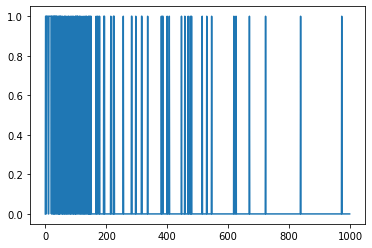

In [18]:
print(train_data[0])
plt.plot(train_data[0])

In [19]:
baseline_model = keras.Sequential([
    # `.summary` 메서드 때문에 `input_shape`가 필요합니다
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                16016     
                                                                 
 dense_13 (Dense)            (None, 16)                272       
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [20]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6028 - accuracy: 0.6906 - binary_crossentropy: 0.6028 - val_loss: 0.4595 - val_accuracy: 0.8150 - val_binary_crossentropy: 0.4595 - 971ms/epoch - 20ms/step
Epoch 2/20
49/49 - 0s - loss: 0.3846 - accuracy: 0.8419 - binary_crossentropy: 0.3846 - val_loss: 0.3492 - val_accuracy: 0.8538 - val_binary_crossentropy: 0.3492 - 286ms/epoch - 6ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3248 - accuracy: 0.8650 - binary_crossentropy: 0.3248 - val_loss: 0.3325 - val_accuracy: 0.8599 - val_binary_crossentropy: 0.3325 - 315ms/epoch - 6ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3093 - accuracy: 0.8725 - binary_crossentropy: 0.3093 - val_loss: 0.3292 - val_accuracy: 0.8603 - val_binary_crossentropy: 0.3292 - 359ms/epoch - 7ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3024 - accuracy: 0.8759 - binary_crossentropy: 0.3024 - val_loss: 0.3286 - val_accuracy: 0.8589 - val_binary_crossentropy: 0.3286 - 354ms/epoch - 7ms/step
Epoch 6/20
49/49 - 0s - loss: 0.2970 - accuracy: 0.8774 - binary

In [21]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 4)                 4004      
                                                                 
 dense_16 (Dense)            (None, 4)                 20        
                                                                 
 dense_17 (Dense)            (None, 1)                 5         
                                                                 
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [22]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6391 - accuracy: 0.6667 - binary_crossentropy: 0.6391 - val_loss: 0.5637 - val_accuracy: 0.7727 - val_binary_crossentropy: 0.5637 - 977ms/epoch - 20ms/step
Epoch 2/20
49/49 - 0s - loss: 0.4865 - accuracy: 0.8129 - binary_crossentropy: 0.4865 - val_loss: 0.4301 - val_accuracy: 0.8337 - val_binary_crossentropy: 0.4301 - 250ms/epoch - 5ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3878 - accuracy: 0.8490 - binary_crossentropy: 0.3878 - val_loss: 0.3711 - val_accuracy: 0.8512 - val_binary_crossentropy: 0.3711 - 332ms/epoch - 7ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3446 - accuracy: 0.8623 - binary_crossentropy: 0.3446 - val_loss: 0.3459 - val_accuracy: 0.8561 - val_binary_crossentropy: 0.3459 - 323ms/epoch - 7ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3231 - accuracy: 0.8685 - binary_crossentropy: 0.3231 - val_loss: 0.3343 - val_accuracy: 0.8590 - val_binary_crossentropy: 0.3343 - 321ms/epoch - 7ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3123 - accuracy: 0.8715 - binary

In [23]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 512)               512512    
                                                                 
 dense_19 (Dense)            (None, 512)               262656    
                                                                 
 dense_20 (Dense)            (None, 1)                 513       
                                                                 
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [24]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 3s - loss: 0.4244 - accuracy: 0.7977 - binary_crossentropy: 0.4244 - val_loss: 0.3276 - val_accuracy: 0.8608 - val_binary_crossentropy: 0.3276 - 3s/epoch - 64ms/step
Epoch 2/20
49/49 - 2s - loss: 0.2927 - accuracy: 0.8785 - binary_crossentropy: 0.2927 - val_loss: 0.3202 - val_accuracy: 0.8616 - val_binary_crossentropy: 0.3202 - 2s/epoch - 46ms/step
Epoch 3/20
49/49 - 2s - loss: 0.2269 - accuracy: 0.9097 - binary_crossentropy: 0.2269 - val_loss: 0.3424 - val_accuracy: 0.8530 - val_binary_crossentropy: 0.3424 - 2s/epoch - 47ms/step
Epoch 4/20
49/49 - 2s - loss: 0.1184 - accuracy: 0.9634 - binary_crossentropy: 0.1184 - val_loss: 0.3995 - val_accuracy: 0.8492 - val_binary_crossentropy: 0.3995 - 2s/epoch - 46ms/step
Epoch 5/20
49/49 - 2s - loss: 0.0330 - accuracy: 0.9938 - binary_crossentropy: 0.0330 - val_loss: 0.5179 - val_accuracy: 0.8495 - val_binary_crossentropy: 0.5179 - 2s/epoch - 47ms/step
Epoch 6/20
49/49 - 2s - loss: 0.0063 - accuracy: 0.9997 - binary_crossentro

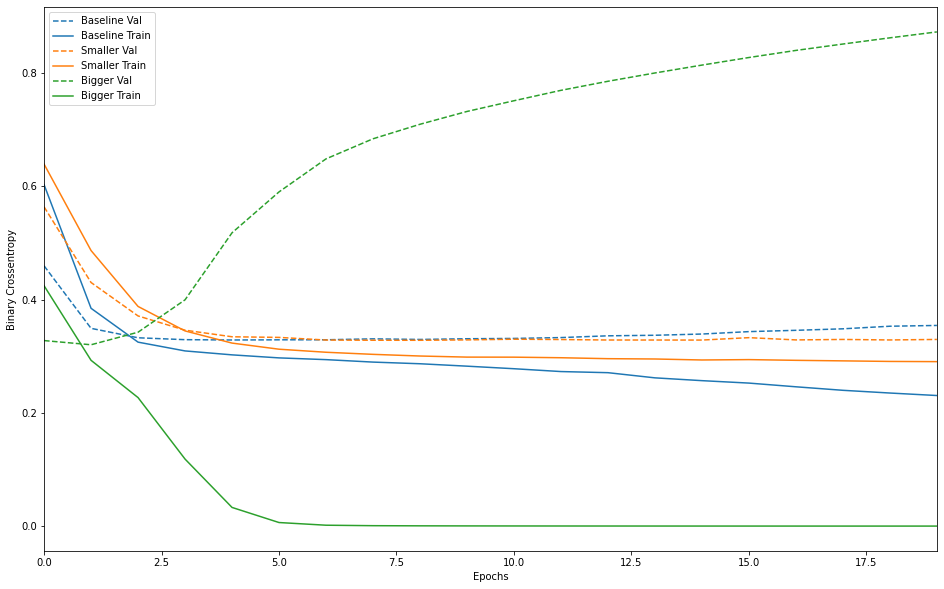

In [25]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

## 가중치를 규제하기

In [26]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6030 - accuracy: 0.7210 - binary_crossentropy: 0.5586 - val_loss: 0.4709 - val_accuracy: 0.8153 - val_binary_crossentropy: 0.4298 - 1s/epoch - 21ms/step
Epoch 2/20
49/49 - 0s - loss: 0.4093 - accuracy: 0.8470 - binary_crossentropy: 0.3693 - val_loss: 0.3848 - val_accuracy: 0.8546 - val_binary_crossentropy: 0.3460 - 323ms/epoch - 7ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3598 - accuracy: 0.8681 - binary_crossentropy: 0.3221 - val_loss: 0.3677 - val_accuracy: 0.8589 - val_binary_crossentropy: 0.3309 - 349ms/epoch - 7ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3448 - accuracy: 0.8736 - binary_crossentropy: 0.3090 - val_loss: 0.3662 - val_accuracy: 0.8589 - val_binary_crossentropy: 0.3313 - 362ms/epoch - 7ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3376 - accuracy: 0.8757 - binary_crossentropy: 0.3035 - val_loss: 0.3620 - val_accuracy: 0.8601 - val_binary_crossentropy: 0.3286 - 302ms/epoch - 6ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3334 - accuracy: 0.8764 - binary_cr

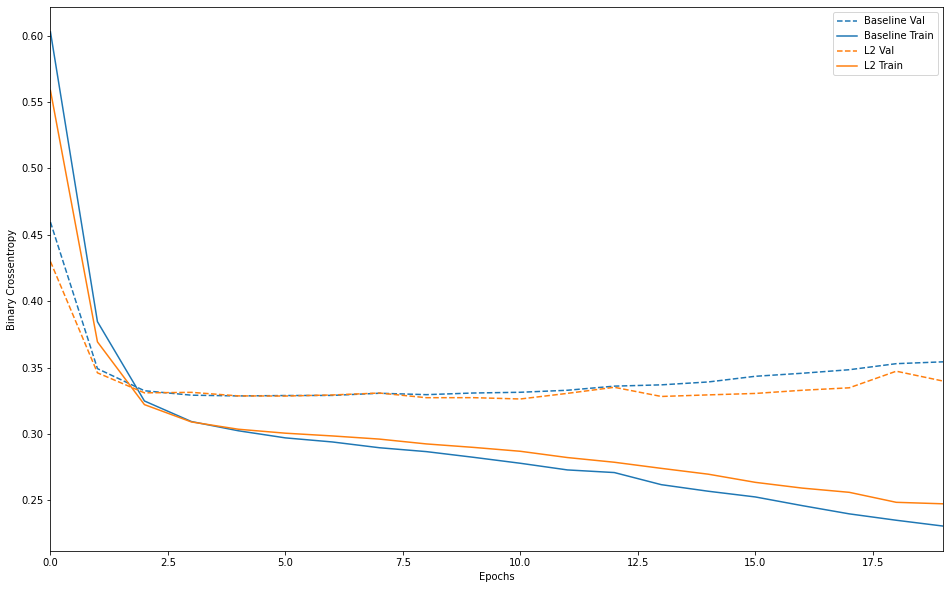

In [27]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

## 드롭아웃 추가하기

In [28]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6899 - accuracy: 0.5439 - binary_crossentropy: 0.6899 - val_loss: 0.6664 - val_accuracy: 0.6679 - val_binary_crossentropy: 0.6664 - 1s/epoch - 21ms/step
Epoch 2/20
49/49 - 0s - loss: 0.6333 - accuracy: 0.6670 - binary_crossentropy: 0.6333 - val_loss: 0.5682 - val_accuracy: 0.7690 - val_binary_crossentropy: 0.5682 - 364ms/epoch - 7ms/step
Epoch 3/20
49/49 - 0s - loss: 0.5459 - accuracy: 0.7626 - binary_crossentropy: 0.5459 - val_loss: 0.4396 - val_accuracy: 0.8380 - val_binary_crossentropy: 0.4396 - 307ms/epoch - 6ms/step
Epoch 4/20
49/49 - 0s - loss: 0.4700 - accuracy: 0.8064 - binary_crossentropy: 0.4700 - val_loss: 0.3868 - val_accuracy: 0.8501 - val_binary_crossentropy: 0.3868 - 347ms/epoch - 7ms/step
Epoch 5/20
49/49 - 0s - loss: 0.4274 - accuracy: 0.8279 - binary_crossentropy: 0.4274 - val_loss: 0.3615 - val_accuracy: 0.8544 - val_binary_crossentropy: 0.3615 - 368ms/epoch - 8ms/step
Epoch 6/20
49/49 - 0s - loss: 0.4007 - accuracy: 0.8412 - binary_cr

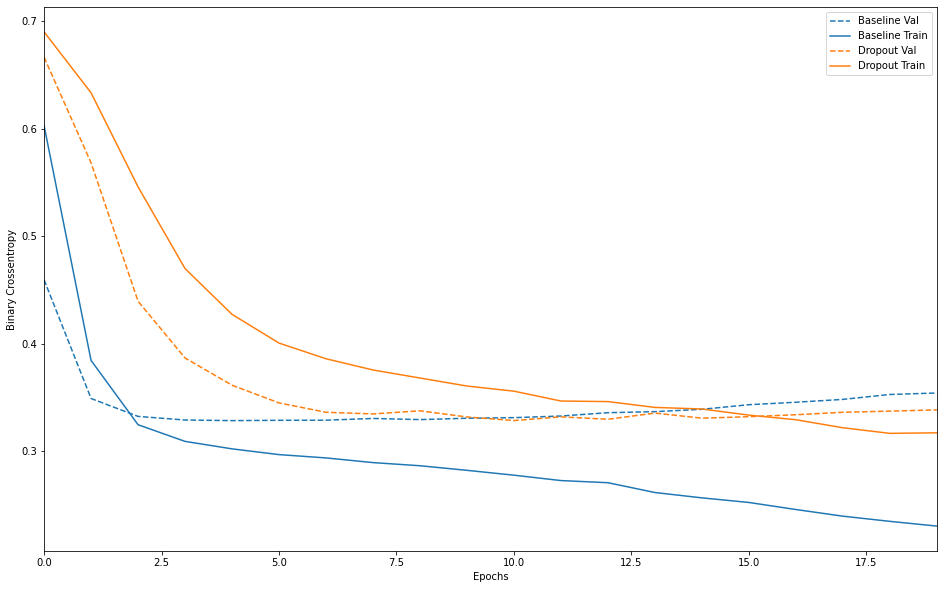

In [29]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])